# Video in Pytjon OpneCV

## Vedio Load

In [1]:
import cv2

class videos():
    
    def __init__(self, string):
        self.video = cv2.VideoCapture( string )
        self.name = string
        self.fps = self.video.get(cv2.CAP_PROP_FPS)
        self.f_count = self.video.get(cv2.CAP_PROP_FRAME_COUNT)
        self.f_width = self.video.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.f_height = self.video.get(cv2.CAP_PROP_FRAME_HEIGHT)
        self.sec = self.f_count / self.fps
        self.nowrate = self.f_count / self.fps

    def __del__(self):
        self.video.release()
        
    def ShowPropeties(self):
        print(self.name + ' 정보')
        print('  fps:', self.fps)
        print('  f_count:', self.f_count)
        print('  f_width:', self.f_width)
        print('  f_height:', self.f_height)
        print('  Video_Length:', self.sec)
    

    def Close(self):
        self.video.release()
        

In [3]:
video1 = videos('영상1.mp4')
video2 = videos('영상2.mp4')
video3 = videos('영상3.mp4')

video1.ShowPropeties()

print(video1.name ," sec = ", video1.f_count / video1.fps)
print(video2.name ," sec = ", video2.sec)
print(video3.name ," sec = ", video3.sec)

video1.Close()
video2.Close()
video3.Close()

del video1
del video2
del video3

영상1.mp4 정보
  fps: 29.877551020408163
  f_count: 244.0
  f_width: 1920.0
  f_height: 1080.0
  Video_Length: 8.166666666666666
영상1.mp4  sec =  8.166666666666666
영상2.mp4  sec =  77.36666666666666
영상3.mp4  sec =  8.7


## Time

In [4]:
import time
start = time.time()  # 시작 시간 저장

print(time.time()-start)

cv2.waitKey(100)

print(time.time()-start)


0.0
0.12092900276184082


## Play Video

In [34]:
video1 = videos('영상1.mp4')

start = time.time()

while video1.video.isOpened():
    # 현재 재생시각을 받아와서, 재생시각의 Vedio Frame의 위치를 계산해서 지정
    nowsec = time.time()-start
    VideoSec = video1.f_count / video1.fps
    VideoRate = nowsec / VideoSec
    VideoNowFrame = VideoRate * video1.f_count
    video1.video.set(cv2.CAP_PROP_POS_FRAMES, VideoNowFrame)
    
    ret, frame = video1.video.read()

    print("Position = ", video1.video.get(cv2.CAP_PROP_POS_FRAMES))

    if ret :
        re_frame = cv2.resize(frame, (round(video1.f_width/4),round(video1.f_height/4)) )
        cv2.imshow('VideoView', re_frame)
        key = cv2.waitKey(int(1000/video1.fps))

        if key == ord('q'):
            break
    else:
        break

video1.video.set(cv2.CAP_PROP_POS_FRAMES, 0)

video1.Close()
cv2.destroyAllWindows()

Position =  1.0
Position =  5.0
Position =  8.0
Position =  11.0
Position =  14.0
Position =  17.0
Position =  20.0
Position =  23.0
Position =  26.0
Position =  29.0
Position =  32.0
Position =  35.0
Position =  38.0
Position =  41.0
Position =  45.0
Position =  48.0
Position =  62.0
Position =  66.0
Position =  69.0
Position =  74.0
Position =  78.0
Position =  83.0
Position =  87.0
Position =  92.0
Position =  97.0
Position =  101.0
Position =  106.0
Position =  111.0
Position =  114.0
Position =  117.0
Position =  121.0
Position =  123.0
Position =  127.0
Position =  129.0
Position =  133.0
Position =  135.0
Position =  138.0
Position =  141.0
Position =  144.0
Position =  147.0
Position =  150.0
Position =  154.0
Position =  157.0
Position =  160.0
Position =  163.0
Position =  167.0
Position =  171.0
Position =  175.0
Position =  178.0
Position =  182.0
Position =  186.0
Position =  190.0
Position =  195.0
Position =  200.0
Position =  202.0
Position =  204.0
Position =  206.0
Po

In [45]:
video1 = videos('영상1.mp4')

start = time.time()

while video1.video.isOpened():
    nowsec = time.time()-start
    video1.video.set(cv2.CAP_PROP_POS_FRAMES, nowsec * video1.fps)
    
    ret, frame = video1.video.read()

    if ret :
        re_frame = cv2.resize(frame, (round(video1.f_width/4),round(video1.f_height/4)) )
        cv2.imshow('VideoView', re_frame)
        key = cv2.waitKey(10)

        if key == ord('q'):
            break
    else:
        break

video1.video.set(cv2.CAP_PROP_POS_FRAMES, 0)

video1.Close()
cv2.destroyAllWindows()

### Play Vedio, Stop and Play

In [5]:
import cv2
import time

class videos():
    
    def __init__(self, string):
        self.video = cv2.VideoCapture( string )
        self.name = string
        self.fps = self.video.get(cv2.CAP_PROP_FPS)
        self.f_count = self.video.get(cv2.CAP_PROP_FRAME_COUNT)
        self.f_width = self.video.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.f_height = self.video.get(cv2.CAP_PROP_FRAME_HEIGHT)
        self.sec = self.f_count / self.fps
        self.nowrate = self.f_count / self.fps

    def __del__(self):
        self.video.release()
        
    def ShowPropeties(self):
        print(self.name + ' 정보')
        print('  fps:', self.fps)
        print('  f_count:', self.f_count)
        print('  f_width:', self.f_width)
        print('  f_height:', self.f_height)
        print('  Video_Length:', self.sec)
    

    def Close(self):
        self.video.release()
    
    def Play(self, n = 0, string = 'VideoView'):
        StartFrame = n * self.fps
        self.video.set(cv2.CAP_PROP_POS_FRAMES, StartFrame)
        del StartFrame
        start = n + time.time()

        while self.video.isOpened():
            nowsec = n + time.time()-start
            self.video.set(cv2.CAP_PROP_POS_FRAMES, nowsec * self.fps)
            del nowsec

            ret, frame = self.video.read()

            if ret :
                re_frame = cv2.resize(frame, (round(self.f_width/2),round(self.f_height/2)) )
                del frame
                cv2.imshow(string, re_frame)
                key = cv2.waitKey(10)

                if key == ord('q'):
                    break

                if key == ord('s'):
                    print("Press s")
                    StopTime =  n + time.time()-start

                    keys = cv2.waitKey(0)
                    while(keys != ord('p')):
                        keys == cv2.waitKey(0)

                    print("Press p")
                    PlayTime =  n + time.time()-start
                    start += PlayTime - StopTime
                    del StopTime
                    del PlayTime

            else :
                break
        self.video.set(cv2.CAP_PROP_POS_FRAMES, 0)
        cv2.destroyAllWindows()

In [6]:
video2 = videos('영상2.mp4')

video2.ShowPropeties()

video2.Play()

영상2.mp4 정보
  fps: 29.98707453683757
  f_count: 2320.0
  f_width: 1920.0
  f_height: 1080.0
  Video_Length: 77.36666666666666
Press s
Press p
Press s
Press p


In [ ]:

cv2.destroyAllWindows()

## Audio Play

In [2]:
# pip install ffpyplayer
from ffpyplayer.player import MediaPlayer

In [6]:
player = MediaPlayer("mpmp.mp4")
val = ''
print("Player Start")
while val != 'eof':
    frame, val = player.get_frame()
    if val != 'eof' and frame is not None:
        img, t = frame
        print(frame)
        # display img
del player
print("End Player")

Player Start
(<ffpyplayer.pic.Image object at 0x00000196B1A19A80>, 0.0)
(<ffpyplayer.pic.Image object at 0x00000196B1A32540>, 0.0)
(<ffpyplayer.pic.Image object at 0x00000196B390EE40>, 0.16666666666666666)
(<ffpyplayer.pic.Image object at 0x00000196B1A19A80>, 0.2)
(<ffpyplayer.pic.Image object at 0x00000196B1A32540>, 0.23333333333333334)
(<ffpyplayer.pic.Image object at 0x00000196B390EE40>, 0.26666666666666666)
(<ffpyplayer.pic.Image object at 0x00000196B1A19A80>, 0.3)
(<ffpyplayer.pic.Image object at 0x00000196B1A32540>, 0.3333333333333333)
(<ffpyplayer.pic.Image object at 0x00000196B390EE40>, 0.36666666666666664)
(<ffpyplayer.pic.Image object at 0x00000196B1A19A80>, 0.4)
(<ffpyplayer.pic.Image object at 0x00000196B1A32540>, 0.43333333333333335)
(<ffpyplayer.pic.Image object at 0x00000196B390EE40>, 0.4666666666666667)
(<ffpyplayer.pic.Image object at 0x00000196B1A19A80>, 0.5)
(<ffpyplayer.pic.Image object at 0x00000196B1A32540>, 0.5333333333333333)
(<ffpyplayer.pic.Image object at 0x0

In [3]:
from ffpyplayer.player import MediaPlayer
import numpy as np
import cv2

player = MediaPlayer("영상1.mp4")
val = ''
print("Play Start")
while val != 'eof':
    frame, val = player.get_frame()
    if val != 'eof' and frame is not None:
        img, t = frame
        print(img)
        w = img.get_size()[0] 
        h = img.get_size()[1]
        arr = np.uint8(np.asarray(list(img.to_bytearray()[0])).reshape(h,w,3)) # h - height of frame, w - width of frame, 3 - number of channels in frame
        print(arr)
        arr=cv2.resize(arr,(320,520))
        cv2.imshow('test1111', arr)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
print("Play End")

Play Start
[[[ 29  29  29]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 [[ 29  29  29]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 ...

 [[209 217 224]
  [209 217 224]
  [209 217 224]
  ...
  [212 215 222]
  [212 215 222]
  [212 215 222]]

 [[212 215 222]
  [212 215 222]
  [212 215 222]
  ...
  [212 215 222]
  [212 215 222]
  [212 215 222]]

 [[212 215 222]
  [212 215 222]
  [212 215 222]
  ...
  [212 215 222]
  [212 215 222]
  [212 215 222]]]
[[[ 29  29  29]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 [[ 29  29  29]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 29  29  29]
  ...
  [ 26  25  28]
  [ 26  25  28]
  [ 26  25  28]]

 ...

 [[209 217 224]
  [209 217 224]
  [209 21

# 1. Python-VLC

In [1]:
import vlc
import time

In [3]:
# vlc 미디어 플레이어 객체 생성하기
media_player = vlc.MediaPlayer()

# 재생할 뮤직비디오 파일을 vlc 모듈의 미디어로 변환.
media = vlc.Media("영상1.mp4")

# 읽어드린 미디어를 재생할 수 있도록 
# 미디어 플레이어 객체에 세팅 (재생 준비 상태)
media_player.set_media(media)

# start playing video
media_player.play()

# wait so the video can be played for 5 seconds
# irrespective for length of video
time.sleep(0.05)
  
# 비디오 정보 출력
print("Frame Rate per Second(fps) : ")
print(media_player.get_fps())
print("Video Width x Height : ")
print(str(media_player.video_get_width())
 + " x " +
 str(media_player.video_get_height()) )
print("Audio Volume : ")
print(media_player.audio_get_volume())
print("Video_Length : ")
print(media_player.get_length()/1000)

media_player.stop()
media_player.release()


Frame Rate per Second(fps) : 
29.87755012512207
Video Width x Height : 
1920 x 1080
Audio Volume : 
100
Video_Length : 
8.197


### Python-VLC 제어

In [5]:
media_player = vlc.MediaPlayer("--audio-visual=visual")
media = vlc.Media("영상2.mp4")
media_player.set_media(media)

# 영상 스케일 조정
media_player.video_set_scale(0.4)
time.sleep(1)
print(f"영상 스케일 : {media_player.video_get_scale}이다.")

# 볼륨 조정
media_player.audio_set_volume(80)
time.sleep(1)
print(f"영상 볼륨 : {media_player.audio_get_volume}이다.")

# 영상 1초 일지중지
media_player.pause()
time.sleep(1)

# 영상 1초 재생
media_player.play()
time.sleep(1)

# 영상 1초 중지
media_player.stop()
time.sleep(1)

# 영상 다시 재생
media_player.play()
time.sleep(1)

# 영상 위치 지정
media_player.set_position(0.3) # 30%
time.sleep(3)
print(f"  - 영상 재생시간: {media_player.get_time()}")
print(f"  - 영상 재생위치: {media_player.get_position()}")
print("\n")

# 영상 배속
media_player.set_rate(1.5) # 1.5배
time.sleep(3)
print(f"  - 현재 재생 속도: {media_player.get_rate()}")
print("\n")
media_player.set_rate(1) # 1배


# 음소거
media_player.audio_toggle_mute()
time.sleep(1)
value = media_player.audio_get_mute()
print(f"  - 현재 음소거 상태: {value}")
print("\n")
 
# 음소거 해제
media_player.audio_toggle_mute()
time.sleep(1)
value = media_player.audio_get_mute()
print(f"  - 현재 음소거 상태: {value}")
print("\n")
 
# 전체화면 - 영상비율도 같이 바꿔줘야 합니다.
media_player.video_set_scale(2)
media_player.set_fullscreen(True)
time.sleep(1)
print("  - 현재 Full screen 상태(get_fullscreen): ", media_player.get_fullscreen())
print("\n")
 
# 전체화면 해제 - 영상비율도 같이 바꿔줘야 합니다.
media_player.video_set_scale(0.4)
media_player.toggle_fullscreen()
time.sleep(1)
print("  - 현재 Full screen 상태(get_fullscreen): ", media_player.get_fullscreen())
print("\n")

# 영상 해제
media_player.release()


영상 스케일 : <bound method MediaPlayer.video_get_scale of <vlc.MediaPlayer object at 0x0000021559FAE020>>이다.
영상 볼륨 : <bound method MediaPlayer.audio_get_volume of <vlc.MediaPlayer object at 0x0000021559FAE020>>이다.
  - 영상 재생시간: 25686
  - 영상 재생위치: 0.33188918232917786


  - 현재 재생 속도: 1.5


  - 현재 음소거 상태: 1


  - 현재 음소거 상태: 0


  - 현재 Full screen 상태(get_fullscreen):  1


  - 현재 Full screen 상태(get_fullscreen):  0




### VLC Player 표준

In [6]:
# 영상 끝까지 재생 후 종료
media_player = vlc.MediaPlayer()


# Event
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    global status 
    status = 1 
media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)

# Setting
media_player.set_media(vlc.Media("영상1.mp4"))
media_player.video_set_scale(0.2)
media_player.play()

# 자동 종료
status = 0
while True:
    time.sleep(0.3)
    if status == 1:
        media_player.release()
    else:
        pass
 

콜백함수호출: 종료호출


OSError: exception: access violation writing 0x0000000000000024

In [32]:
## instance를 활용한 표준

# 소리의 시각화
instance = vlc.Instance()
media_player = instance.media_player_new()

# 이벤트
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    media_player.release()
media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)

# 영상 설정
media = instance.media_new("영상1.mp4")
media_player.set_media(media)
media_player.video_set_scale(0.2)
media_player.play()

## 자동 종료 안됨

0

콜백함수호출: 종료호출


### Python-VLC 소리의 시각화

In [11]:
# 소리의 시각화
instance = vlc.Instance(
    "--audio-visual=visual",
    "--effect-list=scope", #spectrum
    "--effect-fft-window=flattop")
media_player = instance.media_player_new()

# 이벤트
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    media_player.release()
media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)

# 영상 설정
media_player.set_media(vlc.Media("영상1.mp4"))
media_player.video_set_scale(0.5)
media_player.play()

0

콜백함수호출: 종료호출


In [7]:
# 소리의 시각화
instance = vlc.Instance(
    "--audio-visual=visual",
    "--effect-list=scope",
    "--effect-fft-window=flattop")
media_player = instance.media_player_new()

# 이벤트
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    media_player.release()
    global status 
    status = 1 
media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)

# 영상 설정
media_player.set_media(vlc.Media("영상1.mp4"))
media_player.video_set_scale(0.2)
media_player.play()

# 자동 종료
status = 0
while True:
    time.sleep(0.5)
    if status == 1:
        break
    else:
        print(media_player.audio_get_track_description())
        pass

[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\xa9 \xec\x95\x88\xed\x95\xa8'), (1, b'\xed\x8a\xb8\xeb\x9e\x99 1')]
[(-1, b'\xec\x82\xac\xec\x9a\x

KeyboardInterrupt: 

# 2. 소리부분 추출

### wav 파일 파형 이미지화 (librosa)

In [48]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Waveform')

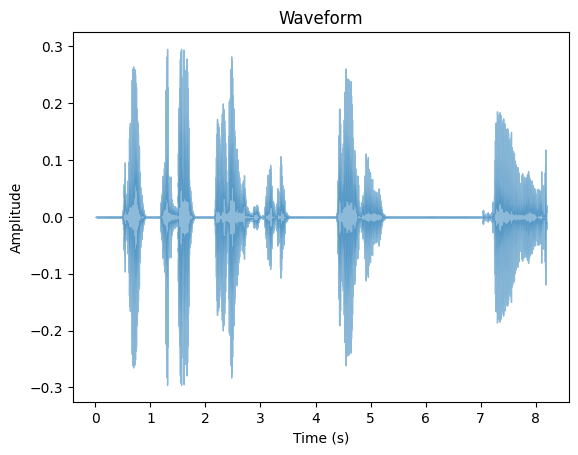

In [61]:
filepath = "D:/test/영상1.wav"

sig, sr = librosa.load(filepath, sr=22050)

plt.figure(filepath)
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### moviepy - mp4 to mp3

In [5]:
import moviepy

In [8]:
import moviepy.editor as mp

clip = mp.VideoFileClip("movie.mp4")
clip.audio.write_audiofile("movie.mp3")

MoviePy - Writing audio in movie.mp3


MoviePy - Done.


### pydub - mp3 to wav

In [1]:
import pydub
from pydub import AudioSegment
import ffmpeg

In [2]:
# files                                                                       
src = "movie.mp3"
dst = "movie.wav"

audSeg = AudioSegment.from_mp3(src)
audSeg.export(dst, format="wav", bitrate=16)

# sound = AudioSegment.from_wav("D:/test/영상1.wav")  
# sound.export("test.mp3", format="mp3")

<_io.BufferedRandom name='movie.wav'>

### Python Mp4 소리 추출 및 시각화

In [2]:
InputFileName = "edit"

Start Converting mp4 to mp3...
MoviePy - Writing audio in edit.mp3


MoviePy - Done.
Start Converting mp3 to wav...
Start making Visualization wav...


Text(0.5, 1.0, 'Waveform')

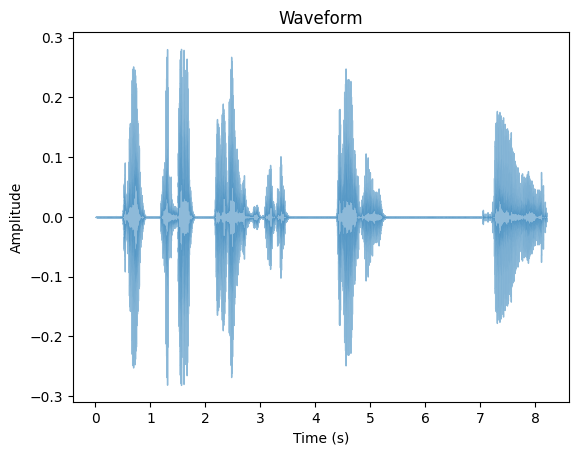

In [3]:
print("Start Converting mp4 to mp3...")
# mp4 to mp3
import moviepy.editor as mp

clip = mp.VideoFileClip(InputFileName+".mp4")
clip.audio.write_audiofile(InputFileName+".mp3")

print("Start Converting mp3 to wav...")
# mp3 to wav
import pydub
from pydub import AudioSegment
import ffmpeg

audSeg = AudioSegment.from_mp3(InputFileName+".mp3")
audSeg.export(InputFileName+".wav", format="wav", bitrate=16)

print("Start making Visualization wav...")

# wav to Visualization
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

filepath = InputFileName+".wav"

sig, sr = librosa.load(filepath, sr=22050)

plt.figure(filepath)
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [128]:
# mp4 to mp3
import moviepy.editor as mp
# mp3 to wav
import pydub
from pydub import AudioSegment
import ffmpeg
# wav to Visualization
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

def getSoundVolume(name, sr) : 
    # mp4 to mp3
    print("Start Converting mp4 to mp3...")
    clip = mp.VideoFileClip(name+".mp4")
    clip.audio.write_audiofile(name+".mp3")
    # mp3 to wav
    print("Start Converting mp3 to wav...")
    audSeg = AudioSegment.from_mp3(name+".mp3")
    audSeg.export(name+".wav", format="wav", bitrate=16)
    # wav to Visualization
    print("Start making Visualization wav...")
    filepath = name+".wav"
    sig, sr = librosa.load(filepath, sr)
    return sig, sr

In [129]:
InputFileName = "edit"
sig, sr = getSoundVolume(InputFileName, 2000)

Start Converting mp4 to mp3...
MoviePy - Writing audio in edit.mp3


MoviePy - Done.
Start Converting mp3 to wav...
Start making Visualization wav...


In [126]:
def drawSoundImage(sig, sr) :
    librosa.display.waveshow(sig, sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")

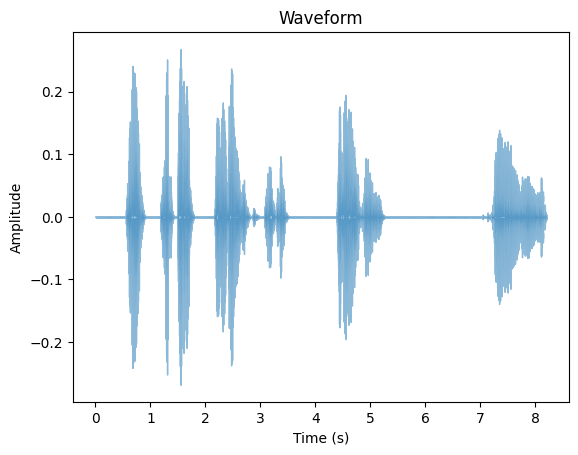

In [127]:
drawSoundImage(sig, sr)

# 3. 소리영역 획득

### Python으로 소리 이미지 그래프 제어

In [27]:

librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

NameError: name 'sqrt' is not defined

In [13]:
sig

array([0.        , 0.        , 0.        , ..., 0.00171847, 0.00227172,
       0.        ], dtype=float32)

In [28]:
import math

Text(0.5, 1.0, 'Waveform')

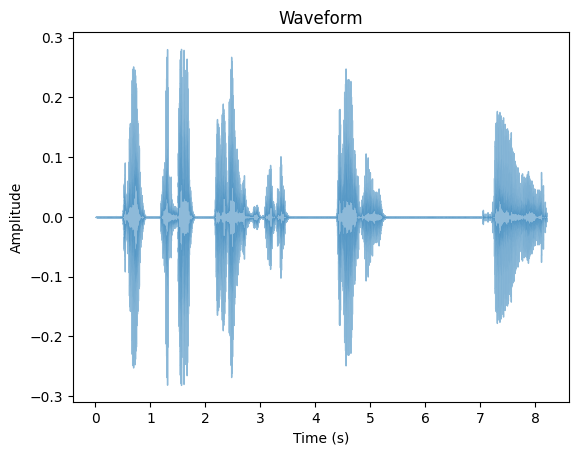

In [36]:

librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [31]:
abs(-10)

10

Text(0.5, 1.0, 'Waveform')

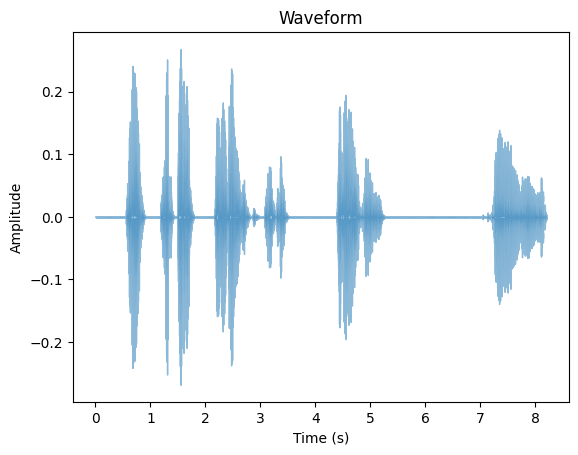

In [7]:
# wav to Visualization
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

filepath = InputFileName+".wav"
dsecs = 2000

sig, sr = librosa.load(filepath, sr=dsecs)

plt.figure(filepath)
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

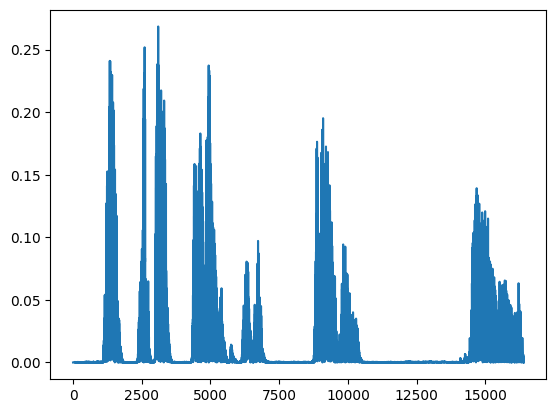

In [150]:
import matplotlib.pyplot as plt

plt.plot(abs(sig))
plt.show()

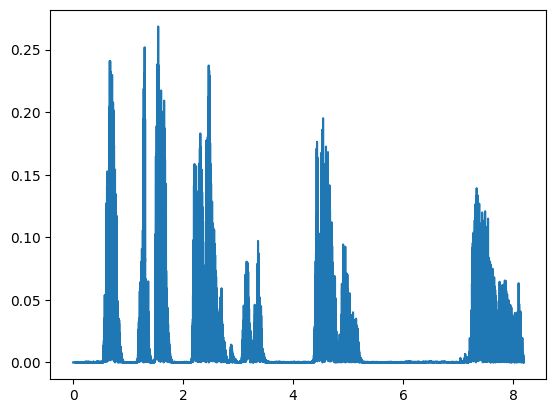

In [149]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

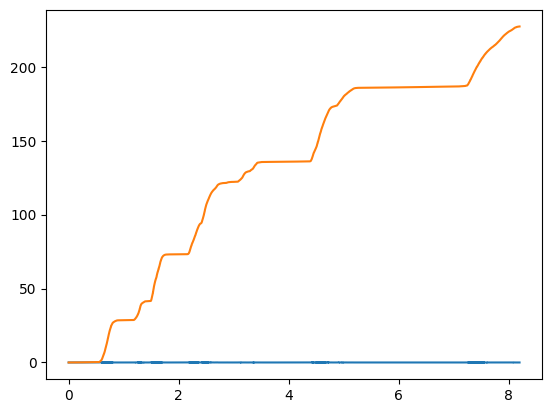

In [154]:
import matplotlib.pyplot as plt
import copy

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

sig1 = copy.deepcopy(sig)

for i in range(1, sig.size) :
    sig1[i]=0
    sig1[i] = sig1[i-1] +  abs(sig[i])

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), sig1)
plt.show()

### Python 소리 이미지 그래프 가공

In [32]:
sig.size/sr

8.2

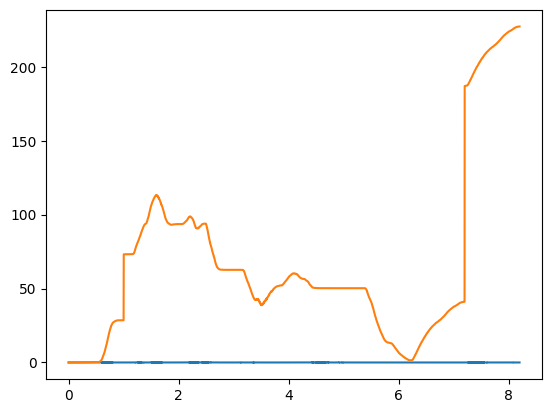

In [125]:
import matplotlib.pyplot as plt
import copy

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

sig1 = copy.deepcopy(sig)

for i in range(1, sig.size) :
    sig1[i]=0
    sig1[i] = sig1[i-1] +  abs(sig[i])

sig2 = copy.deepcopy(sig1)

n = 2 # 측정 범위 2초
dd = dsecs * n

for i in range(int(dd/2), int(sig.size-dd/2)) :
    sig2[i] = 0
    sig2[i] = abs(sig1[int(i+dd/2)]-sig1[int(i-dd/2)])

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), sig2)
plt.show()

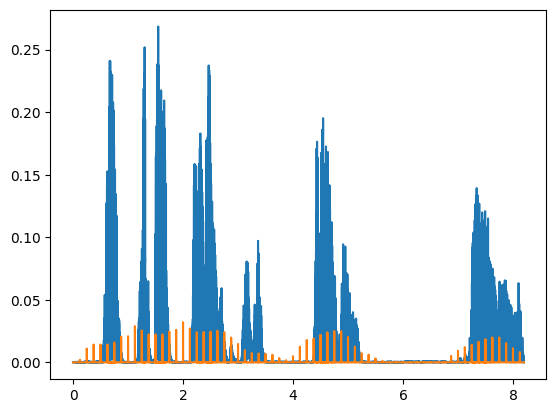

In [36]:
import matplotlib.pyplot as plt
import copy

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

sig1 = copy.deepcopy(sig)

n = 1 # 측정 범위 1초
dd = dsecs * n

for i in range(1, sig.size-1, int(sig.size / sr * 2500 / 82)) :
    sig1[i] = 0
    for j in range(0, int(dd)) :
        a = 0
        if i+(j-dd/2) < 0 or i+(j-dd/2) >= sig.size:
            a = 0
        else :
            a = sig[int(i+(j-dd/2))]
        sig1[i] += abs(a)

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), sig1/dd)

plt.show()

In [39]:
int(sig.size / sr * 2500 / 82)

250

In [40]:
sr

2000

In [41]:
sr/int(sig.size / sr * 2500 / 82)

8.0

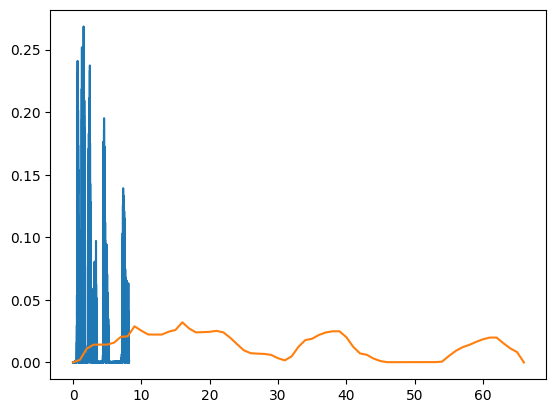

In [76]:
import matplotlib.pyplot as plt
import copy

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

sig1 = np.zeros(1)

n = 1 # 측정 범위 1초
dd = dsecs * n

for i in range(1, sig.size-1, int(1000*n/4)) :
    k = 0
    for j in range(0, int(dd)) :
        a = 0
        if i+(j-dd/2) < 0 or i+(j-dd/2) >= sig.size:
            a = 0
        else :
            a = sig[int(i+(j-dd/2))]
        k += abs(a)
    sig1 = np.insert(sig1, -1 , k )
        

plt.plot(np.arange(0., sig1.size, 1), sig1/dd)

plt.show()

In [67]:
sig1.size

132001

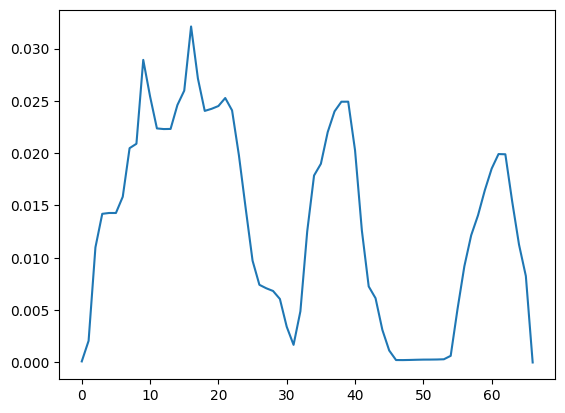

In [73]:
plt.plot(np.arange(0., sig1.size, 1), sig1/dd)

plt.show()

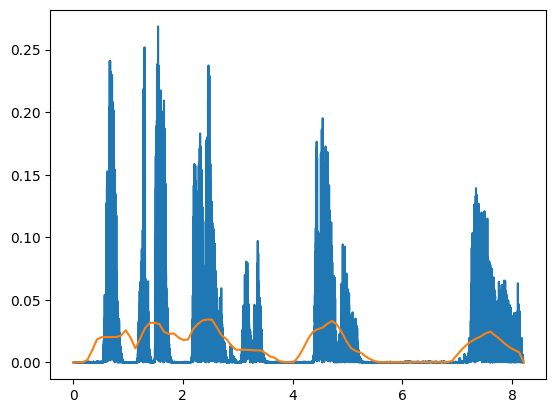

In [110]:
import matplotlib.pyplot as plt
import copy

plt.plot(np.arange(0., sig.size/dsecs, 1/dsecs), abs(sig))

sig1 = np.zeros(1)

n = 0.7 # 측정 범위 1초
dd = dsecs * n

for i in range(1, sig.size-1, int(1000*n/4)) :
    k = 0
    for j in range(0, int(dd)) :
        a = i+(j-dd/2)
        if not(a < 0 or a >= sig.size):
            k += abs( sig[int(a)] )
    sig1 = np.insert(sig1, -1 , k )
        

plt.plot(np.arange(0., (sig.size+200)/sr, 1*((sig.size+200)/sr/sig1.size)), sig1/dd)

plt.show()

In [83]:
sig1.size

67

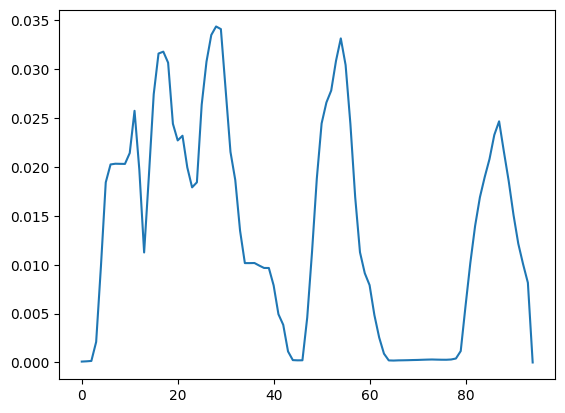

In [109]:
plt.plot(np.arange(0., sig1.size, 1), sig1/dd)

plt.show()

In [137]:
def getSoundIntegral(sig, sr, dsec, n = 1) : 
    sig1 = np.zeros(1)
    dd = dsecs * n

    for i in range(1, sig.size-1, int(1000*n/4)) :
        k = 0
        for j in range(0, int(dd)) :
            a = i+(j-dd/2)
            if not(a < 0 or a >= sig.size):
                k += abs( sig[int(a)] )
        sig1 = np.insert(sig1, -1 , k )
    
    return sig1, dd

In [138]:
InputFileName = "edit"
dsec = 2000
sig, sr = getSoundVolume(InputFileName, dsec)

Start Converting mp4 to mp3...
MoviePy - Writing audio in edit.mp3


MoviePy - Done.
Start Converting mp3 to wav...
Start making Visualization wav...


In [139]:
import matplotlib.pyplot as plt
import copy

sig1, dd = getSoundIntegral(sig, sr, dsec, 1)

In [140]:
def drawGraphVolume(sig1, dd) :
    plt.plot(np.arange(0., sig1.size, 1), sig1/dd)
    plt.show()

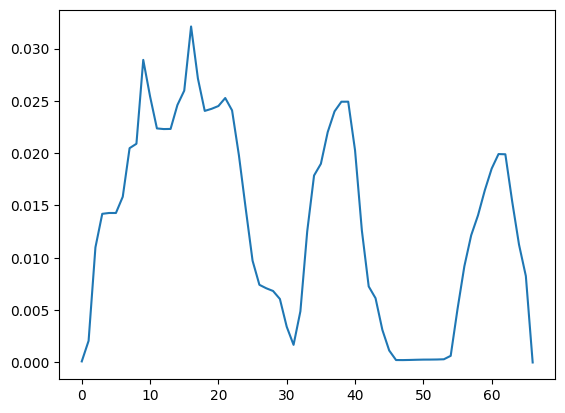

In [141]:
drawGraphVolume(sig1, dd)

### Python 소리 영역 획득

In [148]:
sig1, dd = getSoundIntegral(sig, sr, dsec, 1)

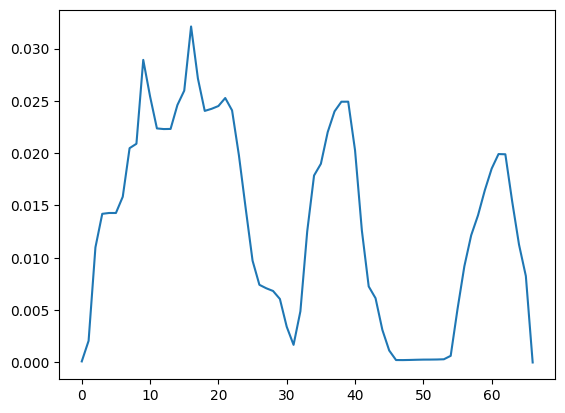

In [158]:
drawGraphVolume(sig1, dd)

In [152]:
기준 : 0.0025

In [159]:
sig1/dd

array([0.00010207, 0.00207139, 0.01099909, 0.01420499, 0.01428421,
       0.0142842 , 0.01583584, 0.02047916, 0.0208984 , 0.02891361,
       0.02541423, 0.02236521, 0.02230362, 0.02231611, 0.0246019 ,
       0.0259764 , 0.03210611, 0.02713296, 0.02403821, 0.02423805,
       0.02450458, 0.02526952, 0.02408689, 0.01980131, 0.01468991,
       0.00972661, 0.00742156, 0.00709268, 0.0068312 , 0.0060675 ,
       0.00341309, 0.00168503, 0.00488879, 0.01253164, 0.01786578,
       0.01898624, 0.0220145 , 0.02399434, 0.02491565, 0.02492028,
       0.02027389, 0.01260472, 0.00726536, 0.00614171, 0.00311356,
       0.00114483, 0.00023277, 0.00022851, 0.0002414 , 0.00025976,
       0.00027388, 0.00027691, 0.00028555, 0.00030632, 0.00063579,
       0.00510815, 0.00919222, 0.01215513, 0.01406424, 0.01646613,
       0.01852653, 0.01991477, 0.01989437, 0.01538917, 0.01126437,
       0.00826133, 0.        ])

In [169]:
for i in range(0, sig1.size) :
    if( sig1[i]/dd < 0.0025 ) :
        print(i)

0
1
31
45
46
47
48
49
50
51
52
53
54
66


In [215]:
1:31
31:45
54:66

SyntaxError: illegal target for annotation (2615440961.py, line 1)

In [214]:
a = [np.zeros(2)]
a = np.append(a, [[10, 11]], axis = 0)
a

array([[ 0.,  0.],
       [10., 11.]])

In [218]:
a = 0
for i in range(0, sig1.size) :
    if( sig1[i]/dd < 0.0025 ) :
        if ( a + 1 == i ):
            a = i
        if ( i - a > 1 ) :
            print(a, ", ", i)
            a = i

1 ,  31
31 ,  45
54 ,  66


In [221]:
k = [np.zeros(2)]

a = 0
for i in range(0, sig1.size) :
    if( sig1[i]/dd < 0.0025 ) :
        if ( a + 1 == i ):
            a = i
        if ( i - a > 1 ) :
            k = np.append(k, [[a, i]], axis = 0)
            a = i
k = np.delete(k, 0, axis=0)
k

array([[ 1., 31.],
       [31., 45.],
       [54., 66.]])

In [223]:
def getRangeVolume(sig1, v = 0.0025) :
    k = [np.zeros(2)]

    a = 0
    for i in range(0, sig1.size) :
        if( sig1[i]/dd < 0.0025 ) :
            if ( a + 1 == i ):
                a = i
            if ( i - a > 1 ) :
                k = np.append(k, [[a, i]], axis = 0)
                a = i
    return np.delete(k, 0, axis=0)

In [225]:
k = getRangeVolume(sig1, 0.0025)
k

array([[ 1., 31.],
       [31., 45.],
       [54., 66.]])

# 4. 영역 자르기

### 자르는 시간 영역 획득

In [233]:
k = getRangeVolume(sig1, 0.0025)
k

array([[ 1., 31.],
       [31., 45.],
       [54., 66.]])

In [253]:
print("추출 Volume 길이 : ", sig1.size)
print("총 영상 길이", sig.size)
print("원본 영상 시간", sig.size/sr, "s")
print(sig.size/sr, "초 동안", sig1.size, "개의 정보가 존재")
print("초당", sig1.size/(sig.size/sr), "개가 존재해야 한다")
print(sig.size/sr, "x", sig1.size/(sig.size/sr), "=", (sig.size/sr)*(sig1.size/(sig.size/sr)) )
print(sig.size/sr, "초 동안", sig1.size, "개의 정보")
print("추출 Volume 길이 1당", (sig.size/sr)/sig1.size )
print("추출 Volume 길이 1이",sig1.size, "개 있으면")
print( (sig.size/sr)/sig1.size, "x", sig1.size, "=", sig1.size*(sig.size/sr)/sig1.size  )

추출 Volume 길이 :  67
총 영상 길이 16400
원본 영상 시간 8.2 s
8.2 초 동안 67 개의 정보가 존재
초당 8.170731707317074 개가 존재해야 한다
8.2 x 8.170731707317074 = 67.0
8.2 초 동안 67 개의 정보
추출 Volume 길이 1당 0.12238805970149252
추출 Volume 길이 1이 67 개 있으면
0.12238805970149252 x 67 = 8.2


In [254]:
k *= (sig.size/sr)/sig1.size
k

array([[0.12238806, 3.79402985],
       [3.79402985, 5.50746269],
       [6.60895522, 8.07761194]])

### 시간 정보를 토대로 한 영상 자르기 및 내보내기

In [261]:
from moviepy.video.io import ffmpeg_tools

# ffmpeg_tools.ffmpeg_extract_subclip(InputFileName+"mp4", 0, 60, targetname=InputFileName+"_Out.mp4")
ffmpeg_tools.ffmpeg_extract_subclip(InputFileName+".mp4", 0, 1.5, targetname=InputFileName+"_Out.mp4")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [262]:
k

array([[0.12238806, 3.79402985],
       [3.79402985, 5.50746269],
       [6.60895522, 8.07761194]])

In [264]:
for i in k :
    print(i[0], ":", i[1])

0.12238805970149252 : 3.794029850746268
3.794029850746268 : 5.507462686567163
6.608955223880597 : 8.077611940298507


In [267]:
from moviepy.video.io import ffmpeg_tools

a = 0
for i in k :
    a+=1
    ffmpeg_tools.ffmpeg_extract_subclip(InputFileName+".mp4", i[0], i[1], targetname=InputFileName+str(a)+"_Out.mp4")


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [269]:
def exportVideo(InPath, InputFileName, OutPath, k) :
    a = 0
    for i in k :
        a+=1
        ffmpeg_tools.ffmpeg_extract_subclip(InPath+InputFileName+".mp4", i[0], i[1], targetname=OutPath+InputFileName+str(a)+"_Out.mp4")


In [270]:
exportVideo("", "edit", "OutPut/", k)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


# 최종 출력 과정

In [1]:
# mp4 to mp3
import moviepy.editor as mp
# mp3 to wav
import pydub
from pydub import AudioSegment
import ffmpeg
# wav to Visualization
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import copy


from moviepy.video.io import ffmpeg_tools

In [71]:
def getSoundVolume(name, sr) : 
    # mp4 to mp3
    print("Start Converting mp4 to mp3...")
    clip = mp.VideoFileClip(name+".mp4")
    clip.audio.write_audiofile(name+".mp3")
    # mp3 to wav
    print("Start Converting mp3 to wav...")
    audSeg = AudioSegment.from_mp3(name+".mp3")
    audSeg.export(name+".wav", format="wav", bitrate=16)
    # wav to Visualization
    print("Start making Visualization wav...")
    filepath = name+".wav"
    sig, sr = librosa.load(filepath, sr)
    return sig, sr

def getWaveVolume(name, sr) :
    # wav to Visualization
    print("Start making Visualization wav...")
    filepath = name+".wav"
    sig, sr = librosa.load(filepath, sr)
    return sig, sr

def drawSoundImage(sig, sr) :
    librosa.display.waveshow(sig, sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")

def getSoundIntegral(sig, sr, dsec, n = 1) : 
    sig1 = np.zeros(1)
    dd = dsec * n

    for i in range(1, sig.size-1, int(1000*n/4)) :
        k = 0
        for j in range(0, int(dd)) :
            a = i+(j-dd/2)
            if not(a < 0 or a >= sig.size):
                k += abs( sig[int(a)] )
        sig1 = np.insert(sig1, -1 , k )
    
    return sig1, dd

def drawGraphVolume(sig1, dd) :
    plt.plot(np.arange(0., sig1.size, 1), sig1/dd)
    plt.show()

def getRangeVolume(sig1, v = 0.0025) :
    k = [np.zeros(2)]

    a = 0
    b = False
    for i in range(0, sig1.size) :
        if( sig1[i]/dd < v ) :
            if ( b ):
                k = np.append(k, [[a, i]], axis = 0)
                b = False
        else : 
            if ( not(b) ) :
                a = i
                b = True
    return np.delete(k, 0, axis=0)


def exportVideo(InPath, InputFileName, OutPath, k) :
    a = 0
    for i in k :
        a+=1
        ffmpeg_tools.ffmpeg_extract_subclip(InPath+InputFileName+".mp4", i[0], i[1], targetname=OutPath+InputFileName+str(a)+"_Out.mp4")


In [27]:
InputFileName = "video_14155_"
dsec = 2000
sig, sr = getSoundVolume(InputFileName, dsec)

Start Converting mp4 to mp3...
MoviePy - Writing audio in video_14155_.mp3


MoviePy - Done.
Start Converting mp3 to wav...
Start making Visualization wav...


In [3]:
# 이미 Wav 파일이 존재할 시
InputFileName = "video_14155_"
dsec = 2000
sig, sr = getWaveVolume(InputFileName, dsec)

Start making Visualization wav...


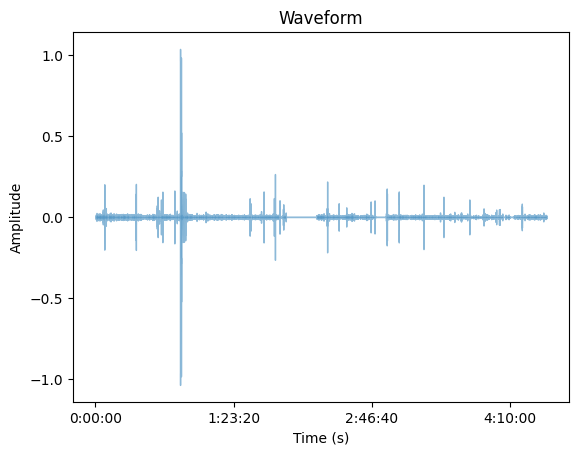

In [4]:
drawSoundImage(sig, sr)

In [5]:
sig1, dd = getSoundIntegral(sig, sr, dsec, 3)

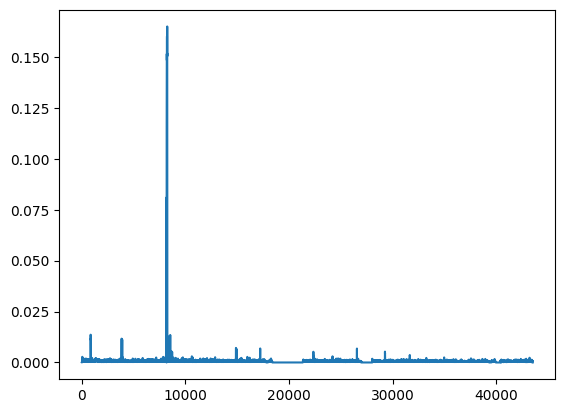

In [6]:
drawGraphVolume(sig1, dd)

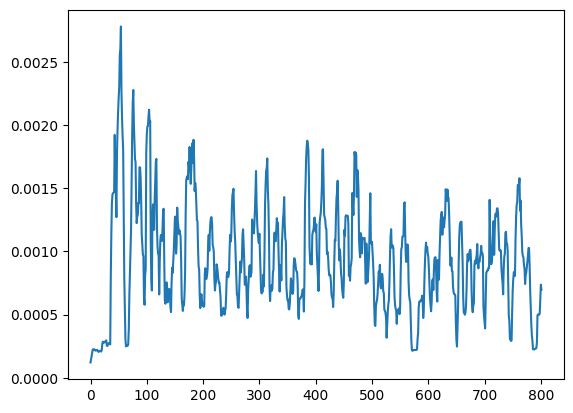

In [30]:
print(sig1.size)
plt.plot(np.arange(0., sig1.size-42700, 1), sig1[0:-42700]/dd)
plt.show()

In [84]:
k = getRangeVolume(sig1, 0.001)

k *= (sig.size/sr)/sig1.size
print(k)
print("k.size = ", k.size)

[[1.38744642e+01 2.24991311e+01]
 [2.66239718e+01 3.48736532e+01]
 [3.71235663e+01 4.04984359e+01]
 ...
 [1.62724965e+04 1.62728715e+04]
 [1.62788713e+04 1.62818712e+04]
 [1.62848711e+04 1.62856210e+04]]
k.size =  1568


In [85]:
exportVideo("", InputFileName, "OutPut/", k)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

# 6. 영상 최종 출력

In [10]:
import vlc
import time

### VLC 활용한 영상 순서대로 출력

In [11]:
InputPath = "OutPut/"
InputFileName = "video_14155_"
a = 1

# 영상 끝까지 재생 후 종료
media_player = vlc.MediaPlayer()

media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)

# Event
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    global status 
    status = 1 


while(a<785) : 

    # Setting
    media_player.set_media(
        vlc.Media(
            InputPath+InputFileName+str(a)+"_Out.mp4"
        )
    )
    media_player.video_set_scale(0.8)
    media_player.play()

    # 자동 종료
    status = 0
    while (status == 0):
        time.sleep(0.3)
        if status == 1:
            media_player.stop()
            a+=1
            print(a)
        else:
            pass
        

콜백함수호출: 종료호출
콜백함수호출: 종료호출
4
콜백함수호출: 종료호출
콜백함수호출: 종료호출
5
콜백함수호출: 종료호출
콜백함수호출: 종료호출
6
콜백함수호출: 종료호출
콜백함수호출: 종료호출
7
콜백함수호출: 종료호출
콜백함수호출: 종료호출
8
콜백함수호출: 종료호출
콜백함수호출: 종료호출
9
콜백함수호출: 종료호출
콜백함수호출: 종료호출
10


KeyboardInterrupt: 

### VLC 영상 반복 및 삭제 기능 구현

In [2]:
import keyboard

while True:
    if keyboard.is_pressed("1"):
        print("hello")
        break

hello


In [7]:
while True:
    if keyboard.is_pressed("r"):
        print("replay")
        break
    if keyboard.is_pressed("d"):
        print("delete")
        break
    if keyboard.is_pressed("n"):
        print("next Video")
        break
    if keyboard.is_pressed("p"):
        print("prev Video")
        break

next Video


In [8]:
InputPath = "OutPut/"
InputFileName = "video_14155_"
a = 784
os.remove(InputPath+InputFileName+str(a)+"_Out_test.mp4")

### VLC 영상 간편 추출 도우미

In [12]:
import vlc
import time
import keyboard

In [14]:
InputPath = "OutPut/"
InputFileName = "video_14155_"
a = 1

# 영상 끝까지 재생 후 종료
media_player = vlc.MediaPlayer()


# Event
def my_call_back(event):
    print("콜백함수호출: 종료호출")
    global status 
    status = 1 


media_player.event_manager().event_attach(
    vlc.EventType.MediaPlayerStopped, my_call_back)


while(a<785) : 

    # Setting
    media_player.set_media(
        vlc.Media(
            InputPath+InputFileName+str(a)+"_Out.mp4"
        )
    )
    media_player.video_set_scale(0.8)
    media_player.play()

    # 자동 종료
    status = 0
    while (status == 0):
        time.sleep(0.3)
        if status == 1:
            media_player.stop()
            while True:
                if keyboard.is_pressed("r"):
                    print("replay : ", a)
                    break
                if keyboard.is_pressed("d"):
                    print("delete : ", a)
                    a += 1
                    media_player.set_media(
                        vlc.Media(
                            InputPath+InputFileName+str(a)+"_Out.mp4"
                        )
                    )
                    os.remove(InputPath+InputFileName+str(a-1)+"_Out.mp4")
                    print("next : ", a)
                    break
                if keyboard.is_pressed("n"):
                    a += 1
                    print("next : ", a)
                    break
                if keyboard.is_pressed("p"):
                    a -= 1
                    print("prev : ", a)
                    break
        else:
            pass
        

콜백함수호출: 종료호출
콜백함수호출: 종료호출
next :  2
콜백함수호출: 종료호출
콜백함수호출: 종료호출
replay :  2
콜백함수호출: 종료호출
콜백함수호출: 종료호출
prev :  1
콜백함수호출: 종료호출
콜백함수호출: 종료호출
delete :  1
next :  2
콜백함수호출: 종료호출
콜백함수호출: 종료호출


KeyboardInterrupt: 